# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [21]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import random

# Import API key
from api_keys import geoapify_key

In [2]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,puerto leguizamo,-0.1934,-74.7819,21.77,98,100,1.16,CO,1676081253
1,1,hobart,-42.8794,147.3294,22.37,67,75,4.63,AU,1676080779
2,2,rikitea,-23.1203,-134.9692,26.53,75,100,7.85,PF,1676081254
3,3,hofn,64.2539,-15.2082,2.82,81,100,1.15,IS,1676081255
4,4,mahebourg,-20.4081,57.7000,26.25,74,7,4.28,MU,1676081256


In [23]:
number_of_colors = len(df)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

['#05840F', '#1955BE', '#F47BCA', '#B6C72B', '#56EECD', '#4CC4EB', '#B87204', '#53A719', '#9A79C4', '#E8DADE', '#7D6FA1', '#4D64CF', '#51C768', '#7F3708', '#90A4D3', '#42326C', '#F8F9CD', '#AD9915', '#16E1F1', '#DE7FB7', '#905B5B', '#1CEB95', '#E75D61', '#ABF4B3', '#791196', '#81C88F', '#D8F199', '#A6DA73', '#56A052', '#0541B0', '#277177', '#F0D426', '#E0506D', '#AC6E46', '#EB8D9F', '#CA0428', '#B29F38', '#18D4A9', '#3FEF4F', '#12E35A', '#82D6EC', '#283D8F', '#468787', '#DD9C35', '#12E66C', '#A53B4C', '#4D8D68', '#BBCB25', '#3785AE', '#76165D', '#D47A17', '#BBE376', '#F3C415', '#57771D', '#36CCA4', '#01124A', '#4C7B4A', '#CCD3D2', '#79B27D', '#20A33D', '#C9734E', '#9049FE', '#2E69C7', '#7077B0', '#BC2C60', '#9D6C9B', '#E8875A', '#07FF27', '#F2E7C8', '#112054', '#24B2A4', '#8891EB', '#94FBA7', '#3AABD7', '#7F4A74', '#33149C', '#26ED5E', '#012EA4', '#7FC744', '#5C4224', '#39A2DC', '#0130C5', '#B50B7D', '#81B193', '#867AD8', '#41F441', '#810C54', '#509D21', '#90212C', '#85D349', '#3FBA01'

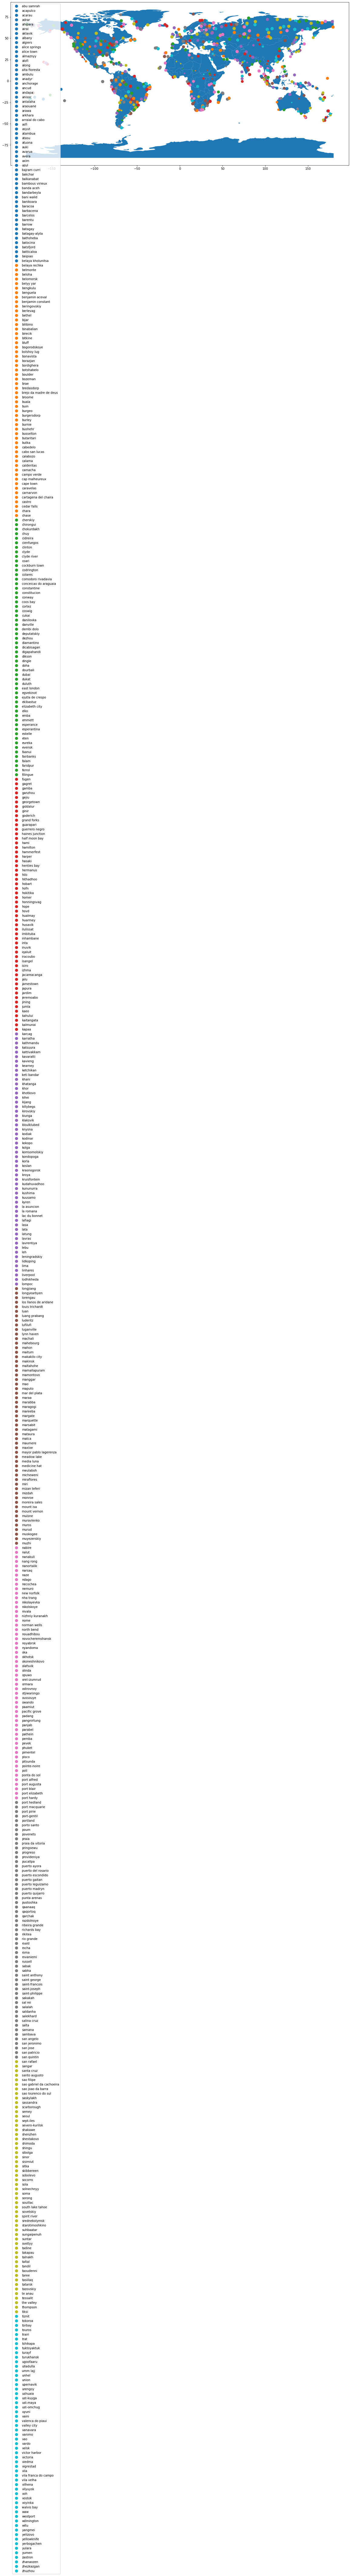

In [36]:
# Configure the map plot
df = pd.read_csv("output_data/cities.csv")
df['Humidity Normalized'] = df[['Humidity']]/df['Humidity'].mean()*20
geometry = [Point(xy) for xy in zip(df['Lng'], df['Lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#gdf.plot(ax=world.plot(figsize=(20, 12)), marker='o', color= color, markersize=df['Humidity'], categorical = True, legend = True);


gdf.plot(ax=world.plot(figsize=(20, 12)), marker='o', markersize=df['Humidity'],column ='City', legend = True);

#need to work on legend 





##cities = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#cities.hvplot(global_extent=True, frame_height=450, tiles=True)
# Display the map

In [40]:
#cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

#cities.hvplot(global_extent=True, frame_height=450, tiles=True)
geometry = [Point(xy) for xy in zip(df['Lng'], df['Lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   
#gdf.plot(ax=world.plot(figsize=(20, 12)), marker='o', markersize=df['Humidity'],column ='City', legend = True);
gdf.hvplot(global_extent=True, frame_height=450, tiles=True,column='City', markersize=df['Humidity'])

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]

---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

In [ ]:
%%capture --no-display



cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

cities.hvplot(global_extent=True, frame_height=450, tiles=True)
# Display the map


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity)

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [43]:
# Narrow down cities that fit criteria and drop any results with null values
# max temp, humidity, cloudiness, windspeed 
my_temp_max= 27
my_temp_min = 21
my_cloudiness=0
my_windspeed= 4.5
my_cities = city_data_df[((city_data_df['Max Temp'] < my_temp_max)) & 
                        ((city_data_df['Max Temp'] > my_temp_min)) &
                        ((city_data_df['Cloudiness'] == my_cloudiness)) &
                        ((city_data_df['Wind Speed'] < my_windspeed))
                         ]
# Drop any rows with null values
my_cities.dropna()

# Display sample data
my_cities

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,6,cape town,-33.9258,18.4232,21.82,68,0,0.89,ZA,1676081133
12,12,busselton,-33.6500,115.3333,21.46,42,0,3.68,AU,1676081048
88,88,rocha,-34.4833,-54.3333,21.13,84,0,2.79,UY,1676081304
187,187,lafiagi,8.8667,5.4167,26.13,21,0,1.18,NG,1676081361
191,191,belmonte,-15.8631,-38.8828,25.00,89,0,3.61,BR,1676081081
200,200,mar del plata,-38.0023,-57.5575,24.01,100,0,3.60,AR,1676081197
256,256,sao lourenco do sul,-31.3653,-51.9783,22.85,85,0,4.33,BR,1676081151
284,284,puerto escondido,15.8500,-97.0667,26.46,73,0,1.54,MX,1676081415
296,296,machali,-34.1833,-70.6667,22.28,30,0,0.36,CL,1676081423
349,349,calderitas,18.5500,-88.2500,24.05,84,0,3.41,MX,1676081452


### Step 3: Create a new DataFrame called `hotel_df`.

In [51]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df= my_cities.copy(deep=True)

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = '' 


# Display sample data
hotel_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel Name
6,6,cape town,-33.9258,18.4232,21.82,68,0,0.89,ZA,1676081133,
12,12,busselton,-33.6500,115.3333,21.46,42,0,3.68,AU,1676081048,
88,88,rocha,-34.4833,-54.3333,21.13,84,0,2.79,UY,1676081304,
187,187,lafiagi,8.8667,5.4167,26.13,21,0,1.18,NG,1676081361,
191,191,belmonte,-15.8631,-38.8828,25.00,89,0,3.61,BR,1676081081,
200,200,mar del plata,-38.0023,-57.5575,24.01,100,0,3.60,AR,1676081197,
256,256,sao lourenco do sul,-31.3653,-51.9783,22.85,85,0,4.33,BR,1676081151,
284,284,puerto escondido,15.8500,-97.0667,26.46,73,0,1.54,MX,1676081415,
296,296,machali,-34.1833,-70.6667,22.28,30,0,0.36,CL,1676081423,
349,349,calderitas,18.5500,-88.2500,24.05,84,0,3.41,MX,1676081452,


In [67]:

# Set parameters to search for a hotel
radius = 10000
params = {'categories': 'accomodation.hotel', 'apiKey':geoapify_key, 'limit':1}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat= row['Lat']
    lon=row["Lng"]
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = 'radiusMeters:' + str(radius)
    params["bias"] = 'proximity:' + str(lon)+ ',' + str(lat)
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"
    


    # Make and API request using the params dictionary
    params_str = {key:str(params[key])+"&" for key in params.keys()}
    params_str = str(params_str).replace("'","").replace(",","").replace(" ","").replace("{","").replace("}","")
    name_address = base_url + '?' + params_str
    
    # Convert the API response to JSON format
  
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search


TypeError: string indices must be integers

### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [ ]:
# Set parameters to search for a hotel
radius = 10000
params = {'categories': 'accomodation.hotel', 'apiKey':geoapify_key, 'limit':1}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    lat= row['Lat']
    lon=row["Lng"]
    
    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params["filter"] = 'radiusMeters:' + str(radius)
    params["bias"] = 'proximity:' + str(lon)+ ',' + str(lat)
    
    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"
    


    # Make and API request using the params dictionary
    params_str = {key:str(params[key])+"&" for key in params.keys()}
    params_str = str(params_str).replace("'","").replace(",","").replace(" ","").replace("{","").replace("}","")
    name_address = base_url + '?' + params_str
    
    # Convert the API response to JSON format
  
    
    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"
        
    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

Starting hotel search
kapaa - nearest hotel: Pono Kai Resort
hilo - nearest hotel: Dolphin Bay Hotel
banda - nearest hotel: #acnindiafy21
makakilo city - nearest hotel: Embassy Suites by Hilton Oahu Kapolei
kahului - nearest hotel: Maui Seaside Hotel
gat - nearest hotel: No hotel found
laguna - nearest hotel: Holiday Inn Express & Suites
tikaitnagar - nearest hotel: No hotel found
san quintin - nearest hotel: Jardines Hotel
santa rosalia - nearest hotel: Hotel del Real
narwar - nearest hotel: No hotel found
port hedland - nearest hotel: The Esplanade Hotel
roebourne - nearest hotel: No hotel found
saint-francois - nearest hotel: Chez Lily
capoterra - nearest hotel: Rosa Hotel
stolac - nearest hotel: Bregava
guerrero negro - nearest hotel: Plaza sal paraiso


,City,Country,Lat,Lng,Humidity,Hotel Name
45,kapaa,US,22.0752,-159.3190,84,Pono Kai Resort
51,hilo,US,19.7297,-155.0900,83,Dolphin Bay Hotel
63,banda,IN,25.4833,80.3333,52,#acnindiafy21
81,makakilo city,US,21.3469,-158.0858,81,Embassy Suites by Hilton Oahu Kapolei
152,kahului,US,20.8947,-156.4700,60,Maui Seaside Hotel
197,gat,IL,31.6100,34.7642,100,No hotel found
211,laguna,US,38.4210,-121.4238,79,Holiday Inn Express & Suites
240,tikaitnagar,IN,26.9500,81.5833,59,No hotel found
265,san quintin,MX,30.4833,-115.9500,74,Jardines Hotel
340,santa rosalia,MX,27.3167,-112.2833,56,Hotel del Real


In [66]:
name_address = list(requests.get(base_url).json()['name_address'])



KeyError: 'name_address'

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [ ]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)